<a href="https://colab.research.google.com/github/heitor-eng/H_Data_Science/blob/master/Milan_Airbnb_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to use python in your making-decision process. At the least for a vacation.

Here I am gonna show and talk about how you can build analysis with python language and throughout statistical tools. The dataset which I use is on the site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

##Italy 

So the place which I choose was Milan in Italy, the reason to choose there was because of my lack of knowledge about what to do there unless seeing a football match between **Internazionale Milano** and **Associazione Calcio Milan**. 

But because of my bold choice, I had to search for information about the places in the city and tourist points.  now for sure when I am able to travel to Europe, Milano will be one of the firsts places to know.

<p align=center>
<img src = "https://github.com/heitor-eng/H_Data_Science/blob/master/Imagens/pexels-j%C3%A9shoots-7522.jpg?raw=true" width = "50%">
</p>




In [ ]:
# Import the Libaries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from IPython.core.pylabtools import figsize

sns.set_style("dark")
%matplotlib inline

##Milan

Milan or Milano is a city with a bunch of nice places to visit as the Duomo, some parks, and to see a few statues. But Milano isn't only that, this city is a city recognized for fashion things and is a financial city, so maybe if one day you went to work in Milan because of one of these two things or something related, this work about **how to choose a place in Milano** can come in handy.

<p align=center>
<img src = "https://github.com/heitor-eng/H_Data_Science/blob/master/Imagens/pexels-francesco-ungaro-409127.jpg?raw=true" width = "50%">

So with the libraries import, now I can start to do the ETL and the EDA work in this dataset about the city of Milan.

In [ ]:
# Store the data
df = pd.read_csv("https://raw.githubusercontent.com/heitor-eng/H_Data_Science/master/Data%20for%20projects/listings_Milan.csv",index_col = "id") 

# Show the nmber of rows and columns
print("In this dataset, the number of columns is: ", df.shape[1])
print("And the number of rows is: ", df.shape[0])
print("\nThe head of the DataFrame:\n")
# The first five dadas about this dataset
df.head()

In this dataset, the number of columns is:  15
And the number of rows is:  18322

The head of the DataFrame:



,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
6400,The Studio Milan,13822,Francesca,NaN,TIBALDI,45.44119,9.17813,Private room,100,4,12,2010-04-19,0.14,1,358
23986,""" Characteristic Milanese flat""",95941,Jeremy,NaN,NAVIGLI,45.44806,9.17373,Entire home/apt,150,1,15,2020-09-07,0.21,1,363
28300,nice flat near the park,121663,Marta,NaN,SARPI,45.47647,9.17359,Private room,180,1,8,2012-04-22,0.11,1,365
32119,Nico & Cynthia's Easy Yellow Suite,138683,Nico&Cinzia,NaN,VIALE MONZA,45.52014,9.22300,Entire home/apt,75,2,15,2018-07-01,0.23,3,200
32649,Nico&Cinzia's Red Easy Suite!,138683,Nico&Cinzia,NaN,VIALE MONZA,45.51874,9.22495,Entire home/apt,71,2,29,2016-10-23,0.71,3,308


## **Data Analysis**
As we could see the DataFrame has a lot of columns (variables) and rows, and to start to understand the dataset, first I will have to dig for more pieces of information about the dataset, which means I am gonna do the **EDA - EXPLORATORY DATA ANALYSIS** and this means that now I am gonna exploring how the dataset is, as like the type of the data, which each variable means and more. Below you will find the meaning of these variables which we have in the dataset much more.

> **Dictionary of the variables**

*   `id` - The number used to identify the houses
*   `name` - Name of the housing offered
*   `host_id` - Property host id number
*   `host_name` - Hostname
*   `neighbourhood_goup` - This column doesn't have values
*   `neighbourhood` - Neighborhood name
*   `latitude` - Property latitude coordinate
*   `longitude` - Property longitude coordinate
*   `room_type` - Type of room is offering
*   `price` - Price to rent the housing
*   `minimum_nights` - Minimum nights to stay on the housing
*   `number_of_reviews` - Number of reviews that the housing received
*   `last_review` - Data of the last review
*   `reviews_per_month` - Number of reviews in each month
*   `calculated_host_listings_count` - Amount of housing the host has
*   `availability_365` - Availability number within 365 days


###**EXPLORATORY DATA ANALYSIS (EDA)**

Now I am gonna try to understand how good is the quality of this data set - which means I am gonna look at what works to build the analysis and what can be wrong before I build analysis with the data in the dataset. 

A good dataset is one where the number of Non-values is low or zero, the outliers do not exist, and other things that usually do not happen.

In [ ]:
# Check the types of each variable
df.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**The Missing Data**

As I said before, the quality of the dataset is directly related to the amount of missing values. It is important to understand early on whether these null values are significant compared to the input data.





In [ ]:
# percentage of missing values
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False).round(4)

neighbourhood_group               1.0000
reviews_per_month                 0.2763
last_review                       0.2763
host_name                         0.0068
name                              0.0005
availability_365                  0.0000
calculated_host_listings_count    0.0000
number_of_reviews                 0.0000
minimum_nights                    0.0000
price                             0.0000
room_type                         0.0000
longitude                         0.0000
latitude                          0.0000
neighbourhood                     0.0000
host_id                           0.0000
dtype: float64

**Observations** 
* The column `neighbourhood_group` has 100% of missing values, 
* The columns `review_per_month` and `last_review` has the same amount of missing values 27,63%.

**Histograms** 

In order to bring visibility to the dataset, I will plot histograms, where I try to show how the values are distributed by columns of the dataset. And through the histograms try to find possible strange values, such as outliers or very out of the standard that the histogram presents.

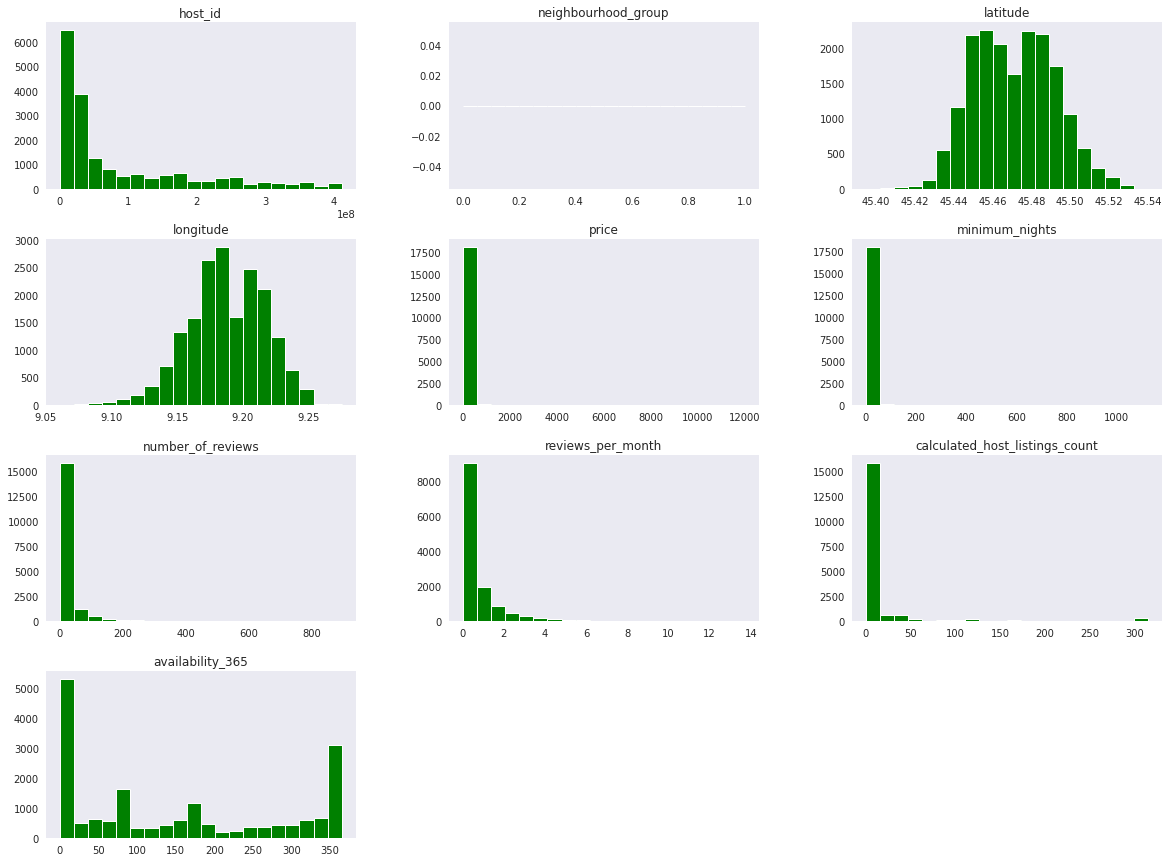

In [ ]:
# Histogram
df.hist(figsize=(20,15), bins = 20, color = "green", grid = False)

#Remove the top and right spines from plot(s)
sns.despine(left = True,bottom = True)

# Plot the histograms
plt.show()

**What did the histograms show to us?**

> The graphics shows which columns (variables) are the ones we have to use when we are looking at the Airbnb app, as like: `price`, `minimum_nights`, and maybe the `number_of_reviews`, because the other columns do not have much weight when you are going to make a decision, so the columns like `reviews_per_month`, `calculated_host_listings_count` and `availability_365` I am not gonna use, And the values in the columns `host_id`, `neighbourhood_group`, `latitude` and `longitude`, are not essential to make a decision, at least for now, because of two things:
* First I am trying to find the places with the best prices and good reviews. 
* Second, the value of these columns just tells the number of the id of the host, the geographic points, and nothing as is the case of the column `neighbourhood_group`. 

**One more thing!**


>Through the distribution of the histogram, it is possible to verify the signs of the presence of outliers in the variables we are going to work with. And to bring light to this matter we can use two tools that will help us to understand where and what is this outlier. Are they:
* The statistical summary using the `.describe()` method,
* Boxplots.

In [ ]:
print("Statistical Summary:\n")
# Statistical summary of the variables 
df[['price','minimum_nights','number_of_reviews']].describe().round(2)

Statistical Summary:



,price,minimum_nights,number_of_reviews
count,18322.00,18322.00,18322.00
mean,115.09,5.80,23.72
std,290.79,26.69,57.66
min,8.00,1.00,0.00
25%,50.00,1.00,0.00
50%,73.50,2.00,3.00
75%,110.00,3.00,19.00
max,11999.00,1124.00,896.00


**Statistical summary analysis**

Through the statistical summary above, we can confirm one of my suspicions, which was the **Presence of Outliers**. Looking at the statistical summary we can notice a few things:

* The max value for the columns `price`, `minimum_nights` are outliers and that can change or influence the analysis. The reason they are outliers is that when you are looking at the $MEAN$ and the $STD$ you see how far are the values for the max value.
* This observation is reinforced when we look at the 25%, 50%, and 75% distribution of the data. And to show that I am gonna plot the Boxplots which will help us in the visualization about how the dataset is now, in this raw way, and after the treatment of these outliers.


---
**Boxplots**

A boxplot is a standardized way of displaying the distribution of data based on a five-number summary ($minimum$, $first$ $quartile (Q1)$, $median$, $third$ $ quartile (Q3)$, and $maximum$).


In [ ]:
#Identify the outliers for the price column
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print("IQR of the variable price is: ", IQR_price)

# Setting the limits
sup_price = q3_price + 1.5*IQR_price
inf_price = q1_price - 1.5*IQR_price
print("Upper limit of price is: ",sup_price)
print("And for the inferior limit is: ",inf_price)

IQR of the variable price is:  60.0
Upper limit of price is:  200.0
And for the inferior limit is:  -40.0


The dataset has 18322 columns,
And 1595 of theses entries are above 200,
Represent 8.71% the dataset.

Through the boxplot below, you can see how the data is dispersed: 


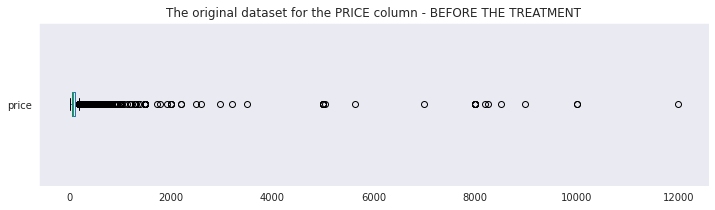

<Figure size 432x288 with 0 Axes>

In [ ]:
# Checking the original dataset
print("The dataset has {} columns,".format(df.shape[0]))
print("And {} of theses entries are above 200,".format(len(df[df.price > 200])))
print("Represent {:.2f}% the dataset.\n".format((len(df[df.price > 200]) / df.shape[0])*100))
print("Through the boxplot below, you can see how the data is dispersed: ")

# Plot the boxplot
fig, ax = plt.subplots(figsize = (12,3))
df.price.plot(kind = 'box', vert = False)
ax.set_title("The original dataset for the PRICE column - BEFORE THE TREATMENT")
plt.show()
plt.tight_layout()


In [ ]:
# Identify the outliers for the minimum_nights column
q1_min = df.minimum_nights.quantile(.25)
q3_min = df.minimum_nights.quantile(.75)
IQR_min = q3_min - q1_min
print("IQR of minimum nights is: ", IQR_min)

# Setting the limits
sup_min = q3_min + 1.5*IQR_min
inf_min = q1_min - 1.5*IQR_min
print("Upper limit of minimuum_nights is: ",sup_min)
print("And for the inferior limit is: ",inf_min)


IQR of minimum nights is:  2.0
Upper limit of minimuum_nights is:  6.0
And for the inferior limit is:  -2.0


The dataset has 18322 columns
And 1876 of theses entries are above 6
Represent 10.24% the dataset



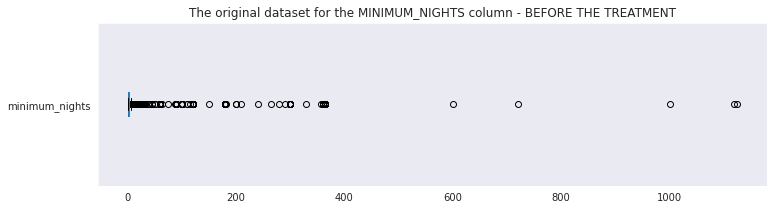

In [ ]:
# checking the original set
print("The dataset has {} columns".format(df.shape[0]))
print("And {} of theses entries are above 6".format(len(df[df.minimum_nights > 6])))
print("Represent {:.2f}% the dataset\n".format((len(df[df.minimum_nights > 6]) / df.shape[0])*100))

# Plot the boxplots
fig, ax = plt.subplots(figsize=(12,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('The original dataset for the MINIMUM_NIGHTS column - BEFORE THE TREATMENT')
plt.show()


**Removing the outliers**

In this part of the work, I am gonna copy the original DataFrame and call this new DataFrame like df_clean and it will be the DataFrame where I am gonna remove the outliers from the columns `price` and `minimum_nights` and will show how these columns, without the outliers, are better to work on they and make a decision and also I am gonna show that throughout **boxplots** and **histograms**. And another reason I am copying the original DataFrame is to not do any type of damage to the original file or in the analysis made so far.

In [ ]:
# Creating a copy of the original DataFrame
df_clean = df.copy()

# Removing the outliers
df_clean.drop(df_clean[df_clean.price > 200].index,axis =0, inplace = True)
df_clean.drop(df_clean[df_clean.price == 0.0].index,axis =0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 6].index, axis=0, inplace=True)

# Before and After
print('DataFrame before: ', df.shape)
print('DataFrame after remove the outliers: ', df_clean.shape)

DataFrame before:  (18322, 15)
DataFrame after remove the outliers:  (14951, 15)


**Boxplot** for the column `price` without outliers.

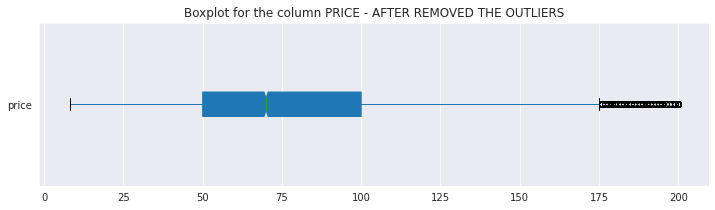


Original size: 18322 columns
Actual size: 14951 columns


In [ ]:
# The df_clean.price Boxplot
fig, ax = plt.subplots(figsize=(12,3))
df_clean.price.plot(kind='box',vert=False, patch_artist = True, notch = True);
ax.xaxis.grid(True)
ax.set_title("Boxplot for the column PRICE - AFTER REMOVED THE OUTLIERS")
plt.show()

print("\nOriginal size: {} columns".format(df.shape[0]))
print("Actual size: {} columns".format(df_clean.shape[0]))

**Boxplot** for the column `minimum_nights` without outliers.

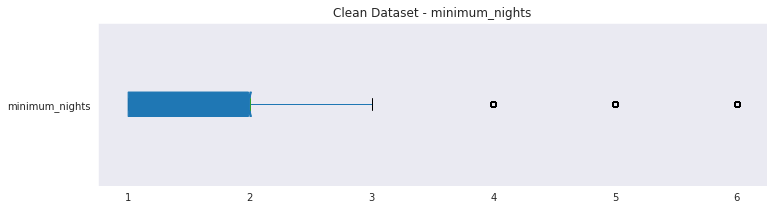


Original size: 18322 columns
Actual size: 14951 columns


In [ ]:
# Boxplot for the variable minimum_nights
fig, ax = plt.subplots(figsize=(12,3))
df_clean.minimum_nights.plot(kind='box', vert=False,patch_artist = True,notch = True);
ax.set_title('Clean Dataset - minimum_nights')
plt.show()
print("\nOriginal size: {} columns".format(df.shape[0]))
print("Actual size: {} columns".format(df_clean.shape[0]))

**Statistical summary** and the **histograms** for the columns `price` and `minimum_nights` which I removed the outliers.

In [ ]:
# Statistical summary for the variables price and minimum nights
df_clean[['price', 'minimum_nights']].describe().round(1)

,price,minimum_nights
count,14951.0,14951.0
mean,80.0,1.9
std,40.5,1.1
min,8.0,1.0
25%,50.0,1.0
50%,70.0,2.0
75%,100.0,2.0
max,200.0,6.0


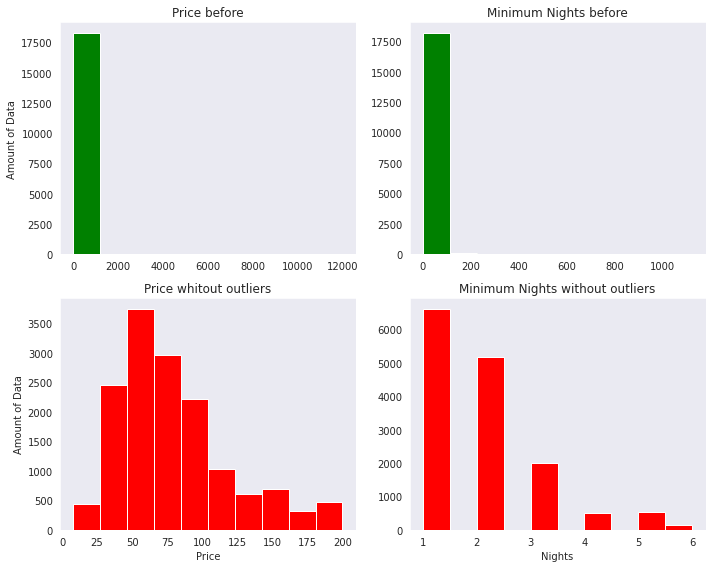

In [ ]:
# Histograms
fig, ((ax0,ax1), (ax2,ax3)) = plt.subplots(nrows = 2, ncols =2,figsize=(10,8))

#Building the variables
b_price = df.price
b_min = df.minimum_nights

a_price = df_clean.price
a_min = df_clean.minimum_nights

# Before
ax0.hist(b_price,bins = 10, histtype ='bar', color = 'green')
ax0.set_title("Price before")
ax0.set_ylabel("Amount of Data")

ax1.hist(b_min,bins = 10, histtype ='bar', color = 'green')
ax1.set_title("Minimum Nights before")

#After
ax2.hist(a_price,bins = 10, histtype ='bar', color = 'red')
ax2.set_title("Price whitout outliers")
ax2.set_ylabel("Amount of Data")
ax2.set_xlabel("Price")

ax3.hist(a_min, bins = 10, histtype ='bar', color = 'red')
ax3.set_title("Minimum Nights without outliers")
ax3.set_xlabel("Nights")

fig.tight_layout()
plt.show()

With all that done, now I can search for correlations between the variables and use this to help in my decision-making process.

**Correlations**

Correlation means that there is a relationship between two factors. In this context, it is interesting to look for a relationship or similarity between them.

In [ ]:
# correlation matrix
corr = (df_clean[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].corr()).round(2)

display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.00,0.05,-0.12,0.04,0.06
minimum_nights,0.05,1.00,-0.07,-0.18,-0.01
number_of_reviews,-0.12,-0.07,1.00,-0.07,0.04
calculated_host_listings_count,0.04,-0.18,-0.07,1.00,-0.01
availability_365,0.06,-0.01,0.04,-0.01,1.00


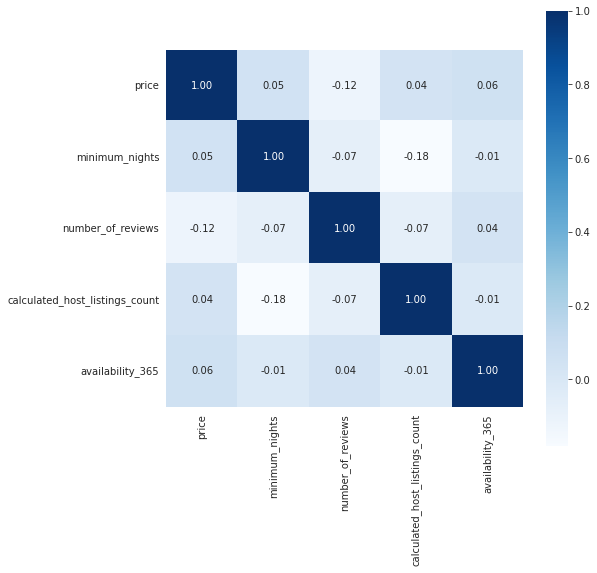

In [ ]:
# heatmap
figsize(8, 8)

sns.heatmap(corr, cmap='Blues', fmt='.2f',square=True, linecolor='white', annot=True);

Alright, so as we can see this time the correlation about the variables does not say anything to us, and this maybe happens because of the lack of data in this dataset, but most of the time the correlations is a handful tools to help into the make-decision process.


###**So far so good!**
The reason I say that is because now we have a dataset with all the treatments that I needed to start to answer a few questions.

This is a data science project and actually, at the same time, I am reading a book about that, and the name of the book is **Data Science for business**, in one of the chapters the author gives us four questions, and in these questions, the reader starts to build insights, analysis, and products with these data.


---
###The questions are:


1.   Who are the most profitable customers?
2.   Is there really a difference between profitable customers and the average customer?
3.  But after all, who are these customers? Can I characterize it?
4.  Will any particular new customers are profitable? How much revenue should I expect this customer to generate?







**Given you some context about how to answer these questions**

* The first question is a simple question which using this dataset I can build an answer for that,
* The second question I am not sure with I have data to answer, 
* The third I can because we have the locations and the prices of each region so this is something I can do, and at last but not least... 
* The fourth question is a question about machine learning where I work with the data and build analysis about expectations, and this is something I will do later in other projects. 

**Who are the most profitable customers and at are their names?**

To answer that I am gonna looking for types of rooms and the the top 10 most expensive places.

In [ ]:
# Understand the type of room that is most common to rent 
df_clean.room_type.value_counts()

Entire home/apt    10893
Private room        3773
Shared room          225
Hotel room            60
Name: room_type, dtype: int64

In [ ]:
# The percentage
((df_clean.room_type.value_counts())/df_clean.shape[0]).round(2)

Entire home/apt    0.73
Private room       0.25
Shared room        0.02
Hotel room         0.00
Name: room_type, dtype: float64

So the **entire home/apt** is the option that the client must prefer and at the second place in the **private room** which makes sense because for these types of rooms we have the group of people who travel with family and the other group is doing some type of individual travel or fast travel.


---


**Now, what is the most expensive neighbourhood in the Dataframe?**

In [ ]:
# Selecting the neighborhood which most appears in the dataset, the top 10
df_clean.neighbourhood.value_counts().sort_values(ascending=False)[:10]

BUENOS AIRES - VENEZIA    1148
DUOMO                      737
NAVIGLI                    699
SARPI                      667
LORETO                     619
TICINESE                   586
CENTRALE                   557
ISOLA                      532
BRERA                      525
XXII MARZO                 468
Name: neighbourhood, dtype: int64

In [ ]:
# The top ten price averages by neighborhood 
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].round(2)

neighbourhood
STEPHENSON              127.80
BRERA                   109.91
DUOMO                   108.85
TRE TORRI               107.83
CHIARAVALLE             105.75
PARCO SEMPIONE          100.85
MAGENTA - S. VITTORE     98.00
PARCO AGRICOLO SUD       98.00
SACCO                    95.00
GUASTALLA                93.94
Name: price, dtype: float64

**What I am able to understand with these two results?**
* First is the region around **Duomo** is the place where with a good amount of places to stay but is kind of expensive because of the average price. That happens because this region has a lot of tourism points to see.
* The second is **Buenos Aires - Venezia** is almost nearly to **Duomo** when you look at Google Maps so is interesting to have an option to stay around Duomo and try to save some money because when you look at the average price, Buenos Aires does not appear in the top 10 expensive prices.

The image below shows to us one part of Duomo.
<p align=center>
<img src = "https://github.com/heitor-eng/H_Data_Science/blob/master/Imagens/duomo-di-milano-5052524_1920.jpg?raw=true" width = "50%">

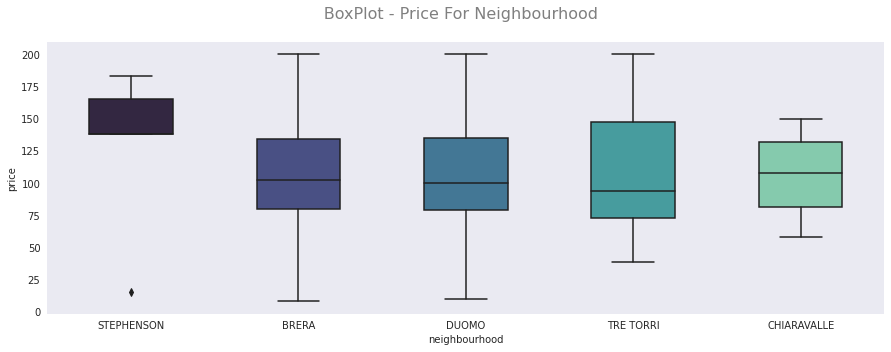

In [ ]:
# Boxplot about the top 5  average prices
fig, ax = plt.subplots(figsize=(15,5))

sns.boxplot(x='neighbourhood',y='price',order = ['STEPHENSON','BRERA','DUOMO','TRE TORRI','CHIARAVALLE'],data=df_clean,palette='mako',width=0.5);

ax.set_title('                                                      BoxPlot - Price For Neighbourhood\n', size=16, color='grey',loc='left')

sns.despine(left=True, bottom=True)
plt.show()

###**Now lets make some Maps**


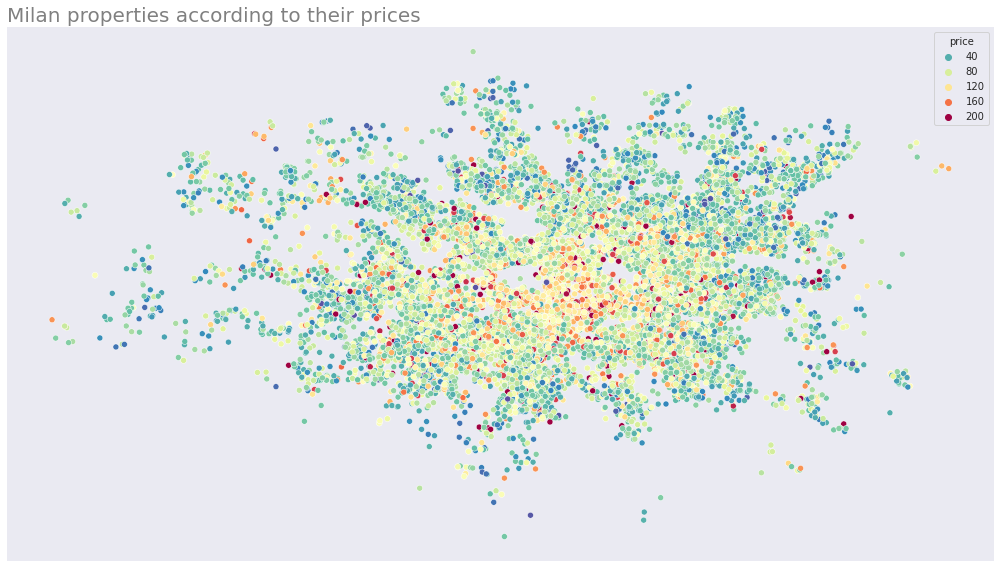

In [ ]:
# Graphic that plots the rented regions
fig, ax = plt.subplots(figsize=(14,8))

sns.scatterplot(x="longitude", y="latitude", data=df_clean, hue="price", palette="Spectral_r")
ax.set_title("Milan properties according to their prices", size=20, loc='left', color='grey')

sns.set_style('white')
sns.despine(left=True, bottom=True)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)


plt.tight_layout()

In [ ]:
# Instal the libary folium
!pip install folium -q

In [ ]:
# Import folium
import folium

In [ ]:
# City of Milan
Milan = folium.Map(width="70%", height="70%",
                    location=[45.464664, 9.188540],
                    zoom_start=9.6,
                    min_zoom=9,
                    max_zoom=13
                    )
Milan.add_child(folium.ClickForMarker(popup='Add by the User'))
# Showing Milan
Milan

In [ ]:
# List  to be used as a filter
values=['DUOMO','BUENOS AIRES - VENEZIA','NAVIGLI']
filtered_df = df_clean[df_clean.neighbourhood.isin(values)]

In [ ]:
# The three most available options to stay next to Duomo
colors = {
 'DUOMO': 'red',
 'BUENOS AIRES - VENEZIA': 'green',
'NAVIGLI':'blue'
 }

Milan_n = folium.Map(width="70%", height="70%",
                    location=[45.464211, 9.191383],
                    zoom_start=9.6,
                    min_zoom=9,
                    max_zoom=13
)

for _, df_clean in filtered_df.iterrows():
    if df_clean['neighbourhood'] in colors.keys():
        folium.Marker(
            location=[df_clean['latitude'], df_clean['longitude']],
            icon=folium.Icon(color=colors[df_clean['neighbourhood']])
        ).add_to(Milan_n)
        

In [ ]:
Milan_n

<p align=center>
<img src = "https://github.com/heitor-eng/H_Data_Science/blob/master/Imagens/Ifolium%20Places.png?raw=true" width = "100%">

###**Conclusion**

So in this project, I was able to work and show a lot of concepts about **data science**, as like the ETL work I had to make at the beginner of the work to remove the outliers, second the way of build graphics which helps us to understand what type of variable as really good and what needs some effort to be able to use. 

And after all that I was able to show if you are traveling to Milan, the best local to stay is nearby to Duomo, because there you have much more options and at least the prices aren't in the top 10 of average prices, but if you have money, you always can stay at Duomo because there is in the top 3 offer and one of the most expensive regions to stay.